# scikit-learn 中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + x + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]

array([[ 1.        , -2.55018931,  6.50346554],
       [ 1.        , -0.69010371,  0.47624313],
       [ 1.        , -0.3148812 ,  0.09915017],
       [ 1.        ,  2.50575219,  6.27879406],
       [ 1.        ,  0.59794494,  0.35753815]])

In [7]:
X[:5, :]

array([[-2.55018931],
       [-0.69010371],
       [-0.3148812 ],
       [ 2.50575219],
       [ 0.59794494]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

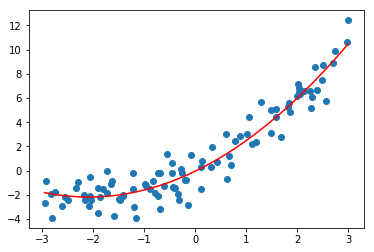

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg2.intercept_

-0.03410290658268611

## 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [18]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [20]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

In [21]:
y_predict

array([8.7118815 , 3.50610871, 1.26707393, 1.79760225, 2.21074587,
       6.81575721, 3.86432449, 1.76699463, 1.23227817, 8.85896784,
       8.47276612, 6.24725708, 7.46192501, 1.27341836, 1.96782639,
       4.62740797, 1.36690107, 4.73412554, 1.60065386, 2.32556653,
       4.170721  , 1.43081352, 1.81096879, 6.24618307, 2.8239816 ,
       1.52588495, 2.71369956, 6.78824759, 7.84338051, 1.39849944,
       1.25346178, 3.36705486, 5.61547087, 5.80981926, 1.24829553,
       1.25202669, 1.24129292, 1.54048672, 2.84750196, 1.24762232,
       1.54743301, 1.3616412 , 4.13024557, 2.70465936, 1.67003265,
       2.99731818, 7.82124027, 1.5146101 , 7.32796722, 2.81824433,
       1.42335516, 4.51835836, 4.21499388, 6.69435915, 4.42886633,
       3.51021414, 1.43595328, 2.29322108, 2.90461203, 1.29155566,
       6.882347  , 7.89099685, 1.39774324, 5.96721975, 7.20744222,
       3.06368863, 8.45317895, 2.03330225, 1.83950486, 4.8636996 ,
       1.32822731, 3.45366381, 1.97480072, 2.99697307, 3.02442

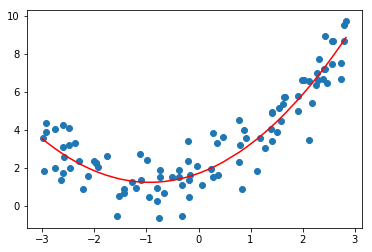

In [22]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()